# Import packages

In [2]:
import sys
import subprocess
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
from anndata import AnnData
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import gseapy as gp
from collections import Counter

sys.path.append('../../monkeybread/src')

import monkeybread as mb 

In [3]:
subprocess.run('mkdir ./output/publication_figures', shell=True)

adata = anndata.read_h5ad('./output/HumanMelanomaPatient2_labeled_niches.h5ad')
adata.uns['log1p']['base'] = None
adata.obs['Cell Type'] = pd.Categorical(
    adata.obs['Cell Type'], 
    categories=[
        'B lineage',
        'CD4 T',
        'CD8 T',
        'Treg',
        'NK',
        'pDC',
        'cDC',
        'mregDC',
        'mono/mac',
        'granulocyte',
        'stromal',
        'malignant',
        'endothelial',
        'other'
    ], ordered=True)

adata_neighbors_immune = anndata.read_h5ad('./output/HumanMelanomaPatient2_neighborhood_profiles.h5ad')

mkdir: cannot create directory ‘./output/publication_figures’: File exists


In [4]:
adata

AnnData object with n_obs × n_vars = 189071 × 500
    obs: 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'Cell Type', 'Cell Subtype', 'is_$CD163^{high}$', 'is_$SPP1^{high}$', 'is_$CXCL9^{high}$', 'is_$CD163^{high}$_density_True', 'is_$SPP1^{high}$_density_True', 'is_$CXCL9^{high}$_density_True', 'niche_subtypes', 'niche'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Cell Subtype_colors', 'Cell Type_colors', 'dendrogram_Cell Subtype', 'dendrogram_Cell Type', 'dendrogram_leiden', 'is_$CD163^{high}$_colors', 'leiden', 'log1p', 'neighbors', 'niche_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_spatial'
    varm: 'PCs'
  

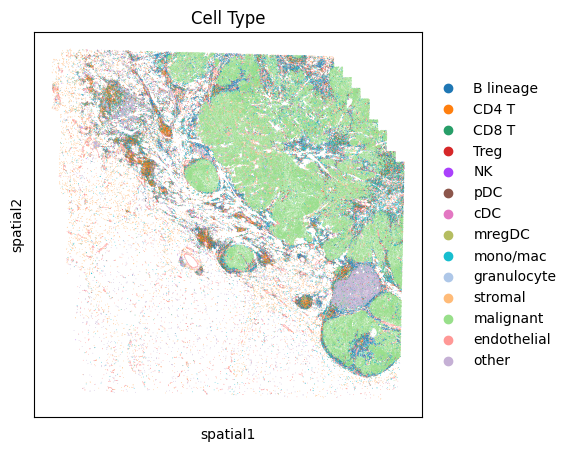

categories: B lineage, CD4 T (DC interaction), CD4 T (Tcm), etc.
var_group_labels: T cell, CD8 T, CD4 T, etc.


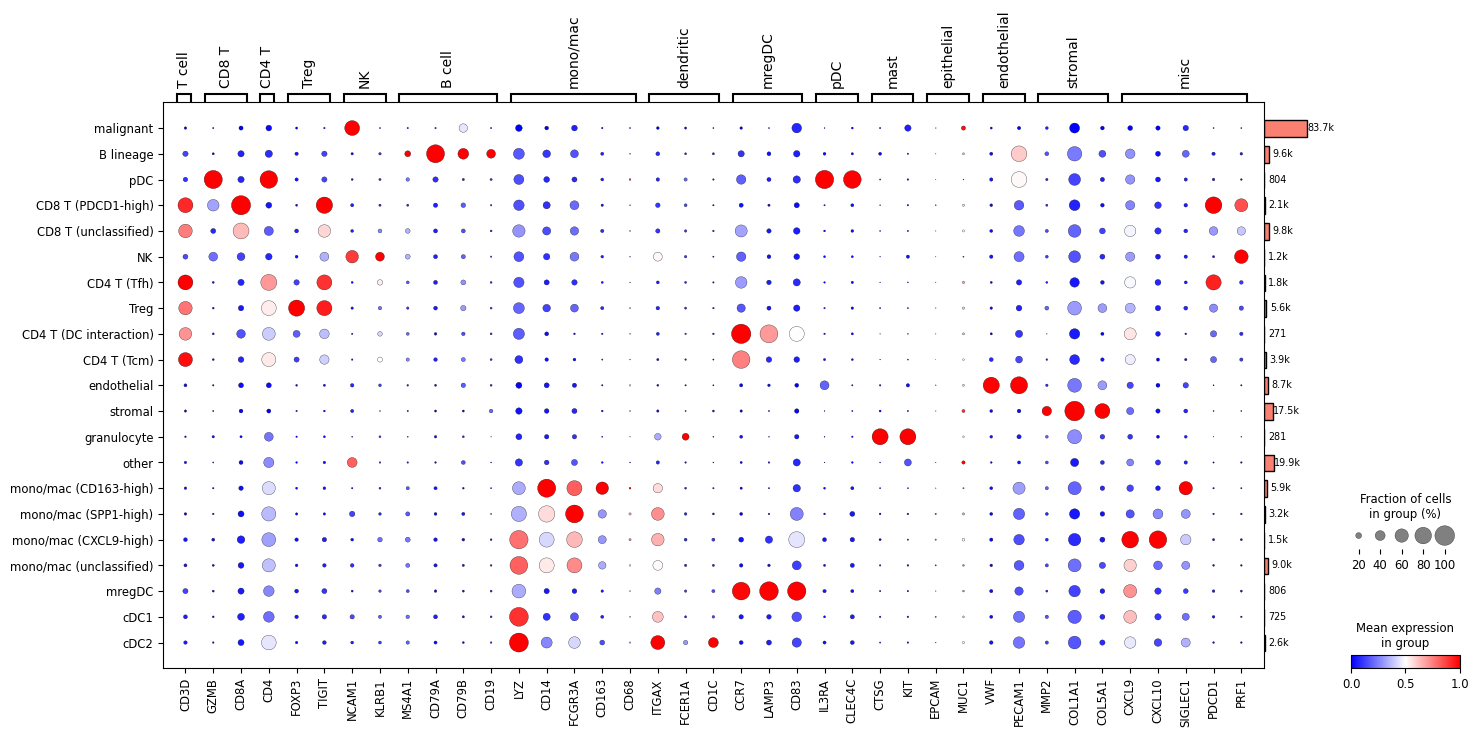

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Type',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
fig.savefig('./output/publication_figures/cell_subtypes_embedding.pdf', format='pdf')
plt.show()


sc.tl.dendrogram(adata, groupby='Cell Subtype')
dp = sc.pl.dotplot(
    adata, 
    var_names={
        'T cell': [
            'CD3D'
        ],
        'CD8 T': [
            'GZMB',
            'CD8A'
        ],
        'CD4 T': [
            'CD4'
        ],
        'Treg': [
            'FOXP3', 
            'TIGIT'
        ],
        'NK': [
            'NCAM1', 
            'KLRB1'
        ],
        'B cell': [
            'MS4A1',
            'CD79A',
            'CD79B',
            'CD19'
        ],
        'mono/mac': [
            'LYZ', 
            'CD14', 
            'FCGR3A', 
            'CD163',
            'CD68'
        ],
        'dendritic': [
            'ITGAX',
            'FCER1A',
            'CD1C'
        ],
        'mregDC': [
            'CCR7',
            'LAMP3',
            'CD83'
        ],
        'pDC': [
            'IL3RA',
            'CLEC4C'
            #LILRA4
            #PLD4  
        ],
        'mast': [
            'CTSG',
            'KIT'
        ],
        'epithelial': [
            'EPCAM',
            'MUC1'
        ],
        'endothelial': [
            'VWF', 
            'PECAM1'
        ],
        'stromal': [
            'MMP2',
            'COL1A1',
            'COL5A1'
        ],
        'misc': [
            'CXCL9',
            'CXCL10',
            'SIGLEC1',
            'PDCD1',
            'PRF1'
        ]
    },
    groupby=['Cell Subtype'],
    standard_scale='var',
    cmap='bwr',
    dendrogram=True,
    return_fig=True
)
dp.add_totals().show()
dp.fig.savefig('./output/publication_figures/all_cells_cell_subtypes_dotplot.png', format='png', bbox_inches='tight', dpi=200)
plt.show()


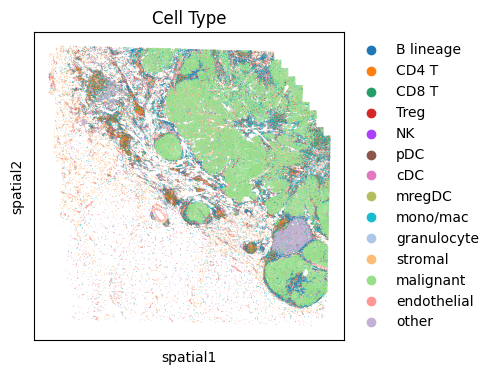

<Figure size 640x480 with 0 Axes>

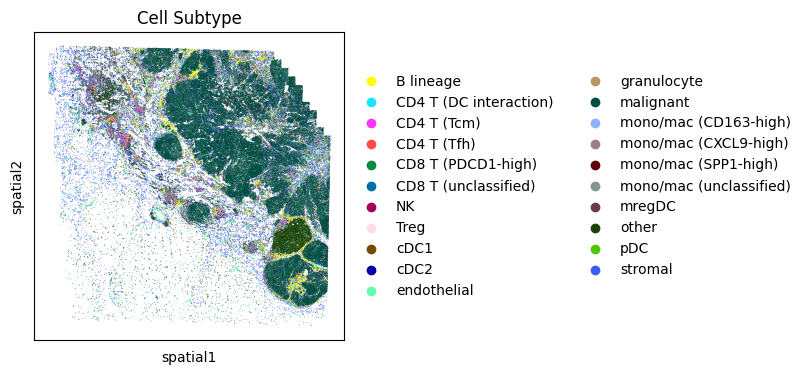

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Type',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()
plt.tight_layout()
fig.savefig('./output/publication_figures/cell_types_embedding.pdf', format='pdf', bbox_inches='tight')
fig.savefig('./output/publication_figures/cell_types_embedding.png', format='png', dpi=250, bbox_inches='tight')


fig, ax = plt.subplots(1, 1, figsize=(4,4))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Subtype',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.godsnot_102,
    show=False
)
plt.show()
plt.tight_layout()
fig.savefig('./output/publication_figures/cell_subtypes_embedding.pdf', format='pdf', bbox_inches='tight')
fig.savefig('./output/publication_figures/cell_subtypes_embedding.png', format='png', dpi=250, bbox_inches='tight')

## Examination of marker genes associated with M1 vs. M2 macrophages

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


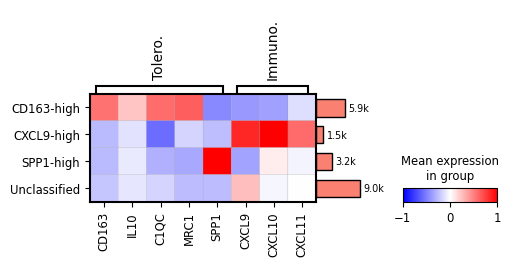

<Figure size 640x480 with 0 Axes>

In [5]:
adata_mac = adata[adata.obs['Cell Type'] == 'mono/mac']
sc.pp.scale(adata_mac)

new_labels = []
for ct in adata_mac.obs['Cell Subtype']:
    if ct == 'mono/mac (CD163-high)':
        new_labels.append('CD163-high')
    elif ct == 'mono/mac (SPP1-high)':
        new_labels.append('SPP1-high')
    elif ct == 'mono/mac (CXCL9-high)':
        new_labels.append('CXCL9-high')
    else:
        new_labels.append('Unclassified')
adata_mac.obs['Mono/mac Subtype'] = new_labels
adata_mac.obs['Mono/mac Subtype'] = adata_mac.obs['Mono/mac Subtype'].astype('category')


sc.tl.dendrogram(adata_mac, groupby='Mono/mac Subtype')

dp = sc.pl.matrixplot(
    adata_mac, 
    var_names={
        'Tolero.': [
            'CD163',
            'IL10',
            'C1QC',
            'MRC1',
            'SPP1',
        ],
        'Immuno.': [
            'CXCL9',
            'CXCL10',
            'CXCL11'
        ]
    },
    groupby='Mono/mac Subtype',
    #standard_scale='var',
    cmap='bwr',
    vmin=-1,
    vmax=1,
    #swap_axes=True,
    return_fig=True
)
dp.add_totals().show()

plt.tight_layout()
dp.fig.savefig('./output/publication_figures/heatmap_mac_markers.png', dpi=200, format='png', bbox_inches='tight')

In [6]:
subprocess.run('gsutil cp gs://immtx_analysis_output/M1_vs_M2_vs_TAM_DE_analysis_results/M1_M2_DE.tsv ./data', shell=True)
subprocess.run('gsutil cp gs://immtx_analysis_output/M1_vs_M2_vs_TAM_DE_analysis_results/M1_TAM_DE.tsv ./data', shell=True)

df_m1_m2_de = pd.read_csv('./data/M1_M2_DE.tsv', sep='\t')
df_m1_m2_de

Copying gs://immtx_analysis_output/M1_vs_M2_vs_TAM_DE_analysis_results/M1_M2_DE.tsv...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      
Copying gs://immtx_analysis_output/M1_vs_M2_vs_TAM_DE_analysis_results/M1_TAM_DE.tsv...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


gene_id gene_name       baseMean  log2FoldChange     lfcSE  \
0       ENSG00000162654.9      GBP4   11957.371207       10.120635  0.389013   
1       ENSG00000126353.3      CCR7    4595.688077        8.579198  0.331178   
2      ENSG00000112096.19      SOD2  104371.359783        5.623334  0.227910   
3      ENSG00000172183.16     ISG20    2952.437311       10.259617  0.454676   
4      ENSG00000154451.15      GBP5   23355.972783        8.411229  0.374020   
...                   ...       ...            ...             ...       ...   
18797  ENSG00000011243.19    AKAP8L    1489.020722       -0.000089  0.299585   
18798  ENSG00000165816.13      VWA2       2.338285        0.000000  3.452931   
18799  ENSG00000072952.20     IRAG1      93.525786        0.000000  2.104812   
18800  ENSG00000159708.18    LRRC36       6.072443        0.000000  4.997424   
18801  ENSG00000172794.20     RAB37     510.557658       -0.000063  0.361771   

            stat         pvalue           padj  is_sig  
0      26.016205  3.247036e-149  6.105077e-145    True  
1      25.905095  5.835191e-148  5.485663e-144    True  
2      24.673458  2.061599e-134  1.292073e-130    True  
3      22.564702  9.632078e-113  4.527558e-109    True  
4      22.488693  5.355403e-112  2.013846e-108    True  
...          ...            ...            ...     ...  
18797  -0.000296   9.997637e-01   9.999764e-01   False  
18798   0.000000   1.000000e+00   1.000000e+00   False  
18799   0.000000   1.000000e+00   1.000000e+00   False  
18800   0.000000   1.000000e+00   1.000000e+00   False  
18801  -0.000175   9.998607e-01   1.000000e+00   False  

[18802 rows x 9 columns]

In [7]:
df_m1_tam_de = pd.read_csv('./data/M1_TAM_DE.tsv', sep='\t')
df_m1_tam_de

gene_id  gene_name      baseMean  log2FoldChange     lfcSE  \
0      ENSG00000056736.10     IL17RB   7910.707623       -9.190566  0.331977   
1       ENSG00000162654.9       GBP4  11957.371207       11.196662  0.431586   
2       ENSG00000126353.3       CCR7   4595.688077        8.420227  0.334098   
3      ENSG00000149131.17   SERPING1   7059.373669        6.306515  0.251351   
4      ENSG00000118777.12      ABCG2   2607.758212       -8.539598  0.356501   
...                   ...        ...           ...             ...       ...   
18797   ENSG00000228140.2  EFHD2-AS1     13.295747        0.000512  0.780246   
18798   ENSG00000184100.6     BRD7P2      8.384733       -0.000509  0.989510   
18799   ENSG00000224051.7       CPTP    607.818163        0.000167  0.381443   
18800  ENSG00000129158.11     SERGEF    270.931760       -0.000086  0.304225   
18801   ENSG00000259904.1   ACTG1P15      4.314839       -0.000286  1.323421   

            stat         pvalue           padj  is_sig  
0     -27.684315  1.078635e-168  2.028050e-164    True  
1      25.943033  2.179140e-148  2.048609e-144    True  
2      25.202861  3.726627e-140  2.335602e-136    True  
3      25.090463  6.320484e-139  2.970944e-135    True  
4     -23.953907  8.413440e-127  3.163790e-123    True  
...          ...            ...            ...     ...  
18797   0.000656   9.994768e-01   9.996895e-01   False  
18798  -0.000514   9.995895e-01   9.997490e-01   False  
18799   0.000437   9.996514e-01   9.997578e-01   False  
18800  -0.000282   9.997753e-01   9.998273e-01   False  
18801  -0.000216   9.998273e-01   9.998273e-01   False  

[18802 rows x 9 columns]

In [8]:
df_m1_v_m2 = df_m1_m2_de.loc[
    (df_m1_m2_de['log2FoldChange'] > 0)
    & (df_m1_m2_de['padj'] < 0.05)   
]
df_m1_v_m2 = df_m1_v_m2.set_index('gene_name')

print(f"DE genes in M1 vs. M2 ({len(set(df_m1_v_m2.index) & set(adata.var_names))} genes):")
print(', '.join(sorted(set(df_m1_v_m2.index) & set(adata.var_names))))
print()

df_m1_v_tam = df_m1_tam_de.loc[
    (df_m1_tam_de['log2FoldChange'] > 0)
    & (df_m1_tam_de['padj'] < 0.05)   
]
df_m1_v_tam = df_m1_v_tam.set_index('gene_name')

print(f"DE genes in M1 vs. TAM ({len(set(df_m1_v_tam.index) & set(adata.var_names))} genes):")
print(', '.join(sorted(set(df_m1_v_tam.index) & set(adata.var_names))))
print()


m1_genes = sorted(set(df_m1_v_m2.index) &set(df_m1_v_tam.index) & set(adata.var_names))

print(f"Joint ({len(m1_genes)} genes): ")
print(', '.join(m1_genes))





DE genes in M1 vs. M2 (134 genes):
ADAMTS4, AKT3, ASCL2, AURKA, BAK1, BCL2, BST2, C1QC, CASP8, CCL17, CCL2, CCL3, CCL4, CCL5, CCL7, CCL8, CCR10, CCR7, CD14, CD244, CD274, CD40, CD79B, CD80, CDH5, CEACAM1, CIITA, CMKLR1, COL1A1, CTLA4, CXCL1, CXCL10, CXCL11, CXCL2, CXCL5, CXCL8, CXCL9, CXCR3, CYBB, DES, EPHA2, EZH2, FAP, FCGR2A, FCGR3A, FFAR2, GZMB, HIF1A, HLA-B, HLA-C, HLA-DPA1, HLA-DPB1, HLA-DQA1, HLA-DRA, HLA-DRB1, ICAM1, ICAM3, ICOSLG, IDO1, IDO2, IFITM1, IKZF4, IL12A, IL1B, IL23A, IL2RA, IL4I1, IL6, IRF3, IRF4, ITGA1, ITK, JAK1, KIR2DL4, KIT, LAG3, LAMB3, LAMP3, LDHA, LRP6, LYZ, MARCO, MUC1, MYH11, NEDD4, NFE2L2, NFKB1, NFKB2, NFKBIA, NKG7, NLRC5, PAX5, PDCD1LG2, PDGFB, PDGFRA, PDPN, PKM, PLOD2, PTGS2, PTPRC, RB1, RELA, S100A9, SELPLG, SERPINA1, SIGLEC1, SNAI1, SOCS3, SOD2, SRC, STAP1, STAT1, STAT3, STAT4, STAT5A, STING1, TAP1, TAP2, TAPBP, TBK1, TCF7L2, TGFB3, TLR1, TLR2, TNF, TNFRSF4, TNFRSF9, TNFSF10, TNFSF9, VCAM1, VEGFA, VSIR, VTN, WNT5A

DE genes in M1 vs. TAM (122 genes):
AD

In [9]:
df_m2_vs_m1 = df_m1_m2_de.loc[
    (df_m1_m2_de['log2FoldChange'] < 0)
    & (df_m1_m2_de['padj'] < 0.05)   
]
df_m2_vs_m1 = df_m2_vs_m1.set_index('gene_name')

print(f"DE genes in M2 vs. M1 ({len(set(df_m2_vs_m1.index) & set(adata.var_names))} genes):")
print(', '.join(sorted(set(df_m2_vs_m1.index) & set(adata.var_names))))
print()

df_tam_v_m1 = df_m1_tam_de.loc[
    (df_m1_tam_de['log2FoldChange'] < 0)
    & (df_m1_tam_de['padj'] < 0.05)   
]
df_tam_v_m1 = df_tam_v_m1.set_index('gene_name')

print(f"DE genes in TAM vs. M1 ({len(set(df_tam_v_m1.index) & set(adata.var_names))} genes):")
print(', '.join(sorted(set(df_tam_v_m1.index) & set(adata.var_names))))
print()


m2_genes = sorted( set(df_m2_vs_m1.index) & set(adata.var_names))
tam_genes = sorted( set(df_tam_v_m1.index) & set(adata.var_names))
m2_tam_genes = sorted( (set(df_m2_vs_m1.index) | set(df_tam_v_m1.index)) & set(adata.var_names))

print(f"Joint ({len(m2_tam_genes)} genes): ")
print(', '.join(m2_tam_genes))

DE genes in M2 vs. M1 (80 genes):
BIRC5, BMP1, CCL26, CCL28, CD1B, CD1C, CD1E, CD2, CD209, CD22, CD248, CD276, CD28, CD68, CD79A, CDH1, CDK4, COL4A1, COL6A3, CR2, CXCR1, DNMT1, DNMT3A, DUSP6, E2F1, EGR1, ERBB3, ESCO2, FCER2, FGFR1, FLI1, FLT1, FN1, FOS, FOXM1, IFNGR1, IGF1R, IKZF2, IL1R2, INSR, IRS1, ITGA4, ITGAM, ITGAX, JUN, KLF2, KLRG1, LRP1, MCM2, MCM6, MKI67, MMP1, MMP12, MRC1, MSH2, MSR1, MYBL2, MYC, NRP1, PDGFC, PDK4, PGF, PKIB, PLK1, PRKCA, PTK2, RET, ROR1, SPP1, TGFBR2, TGM2, THBD, TMEM37, TNC, TRAC, TREM2, TSC1, VEGFB, VWF, WWTR1

DE genes in TAM vs. M1 (78 genes):
APC, BMP1, CCL26, CCL28, CD163, CD1C, CD2, CD209, CD22, CD226, CD276, CD28, CD68, CD79A, CDH1, CDK4, COL4A1, COL6A3, CR2, CSF1R, CXCR1, DNMT1, DNMT3A, DUSP6, EGR1, ENG, ETS1, FCER1A, FCER2, FCGR3A, FGFR1, FLT1, FN1, FOS, HAVCR2, IFNGR1, IKZF2, IL1R2, ITGA4, ITGAM, ITGAX, JUN, KLF2, KLRG1, LRP1, LRP5, MMP1, MMP12, MMP7, MRC1, MSR1, MYC, NRP1, PDGFA, PDGFB, PDGFC, PGF, PKIB, PLOD2, PPARD, PRKCA, ROR1, SERPINE1, SOCS3,

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disks/scratch/mbernstein/miniconda3/p

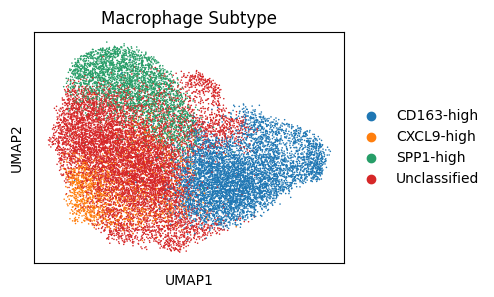

<Figure size 640x480 with 0 Axes>

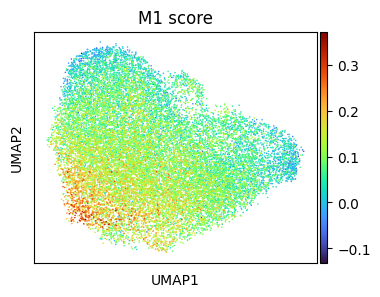

<Figure size 640x480 with 0 Axes>

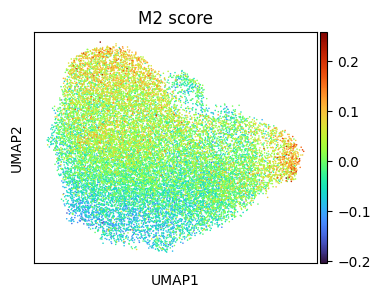

<Figure size 640x480 with 0 Axes>

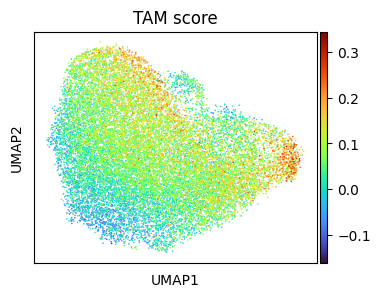

<Figure size 640x480 with 0 Axes>

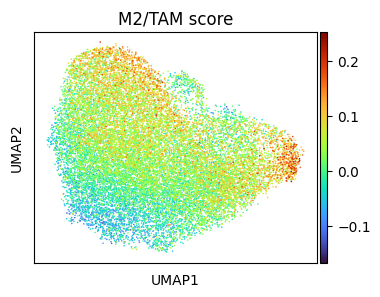

<Figure size 640x480 with 0 Axes>

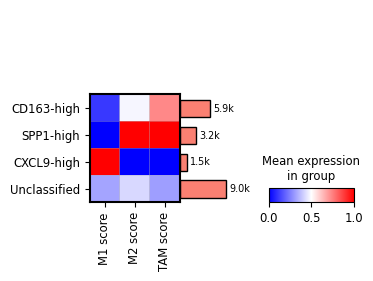

<Figure size 640x480 with 0 Axes>

In [10]:
adata_mac = adata[adata.obs['Cell Type'] == 'mono/mac']

sc.pp.pca(adata_mac)
sc.pp.neighbors(adata_mac)
sc.tl.umap(adata_mac)

sc.tl.score_genes(adata_mac, m1_genes, score_name='M1 score')
sc.tl.score_genes(adata_mac, m2_genes, score_name='M2 score')
sc.tl.score_genes(adata_mac, tam_genes, score_name='TAM score')
sc.tl.score_genes(adata_mac, m2_tam_genes, score_name='M2/TAM score')

new_subtypes = []
for ct in adata_mac.obs['Cell Subtype']:
    if ct == 'mono/mac (CD163-high)':
        new_subtypes.append('CD163-high')
    elif ct == 'mono/mac (SPP1-high)':
        new_subtypes.append('SPP1-high')
    elif ct == 'mono/mac (CXCL9-high)':
        new_subtypes.append('CXCL9-high')
    elif ct == 'mono/mac (unclassified)':
        new_subtypes.append('Unclassified')
adata_mac.obs['Macrophage Subtype'] = new_subtypes

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.umap(
    adata_mac, 
    color='Macrophage Subtype', 
    s=5, 
    palette=sc.pl.palettes.vega_20_scanpy,
    ax=ax
)
plt.tight_layout()
fig.savefig(
    './output/publication_figures/umap_mac_subtype.png',
    dpi=200,
    bbox_inches='tight',
    format='png'
)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.umap(
    adata_mac, 
    color='M1 score', 
    s=5, 
    cmap='turbo',
    ax=ax
)
plt.tight_layout()
fig.savefig(
    './output/publication_figures/umap_mac_m1_score.png',
    dpi=200,
    format='png'
)
plt.show()


fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.umap(
    adata_mac, 
    color='M2 score', 
    s=5, 
    cmap='turbo',
    ax=ax
)
plt.tight_layout()
fig.savefig(
    './output/publication_figures/umap_mac_m2_score.png',
    dpi=200,
    format='png'
)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.umap(
    adata_mac, 
    color='TAM score', 
    s=5, 
    cmap='turbo',
    ax=ax
)
plt.tight_layout()
fig.savefig(
    './output/publication_figures/umap_mac_tam_score.png',
    dpi=200,
    format='png'
)
plt.show()


fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.umap(
    adata_mac, 
    color='M2/TAM score', 
    s=5, 
    cmap='turbo',
    ax=ax
)
plt.tight_layout()
fig.savefig(
    './output/publication_figures/umap_mac_m2_tam_score.png',
    dpi=200,
    format='png'
)
plt.show()


sc.tl.dendrogram(adata_mac, groupby='Macrophage Subtype')
dp = sc.pl.matrixplot(
    adata_mac, 
    var_names=['M1 score', 'M2 score', 'TAM score'], 
    standard_scale='var',
    cmap='bwr',
    groupby='Macrophage Subtype', 
    dendrogram=True,
    return_fig=True
)
dp.add_totals().show()
plt.tight_layout()
dp.fig.savefig('./output/publication_figures/heatmap_mac_sig_scores.png', dpi=200, format='png', bbox_inches='tight')

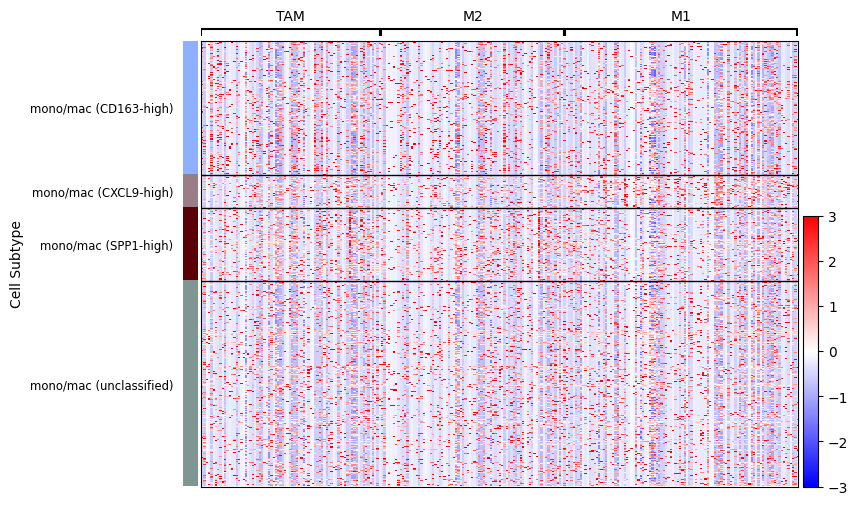

In [11]:
adata_mac_plot = adata_mac.copy()
sc.pp.scale(adata_mac_plot)
#sc.tl.dendrogram(adata_mac_plot, groupby='Subtype')


sc.pl.heatmap(
    adata_mac_plot, 
    var_names={
        'TAM': tam_genes,
        'M2': m2_genes,
        'M1': m1_genes
    },
    groupby='Cell Subtype',
    #standard_scale='var',
    cmap='bwr',
    vmin=-3,
    vmax=3,
    swap_axes=False,
    #return_fig=True
)

## Examination of spatial distribution of M1 vs. M2 macrophages

### Kernel density plots

Monkeybread enables one to visualize the spatial density of cells of a given cell type across the tissue using kernel density estimation. Below, we calculate and then display the distribution of M2-like macrophages across the tissue.

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../monkeybread/src/monkeybread/calc/_cell_density.py:81: RuntimeWarning: overflow encountered in exp
  kernel = 1 / np.exp(np.square(bin_distances / bandwidth))
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../mo

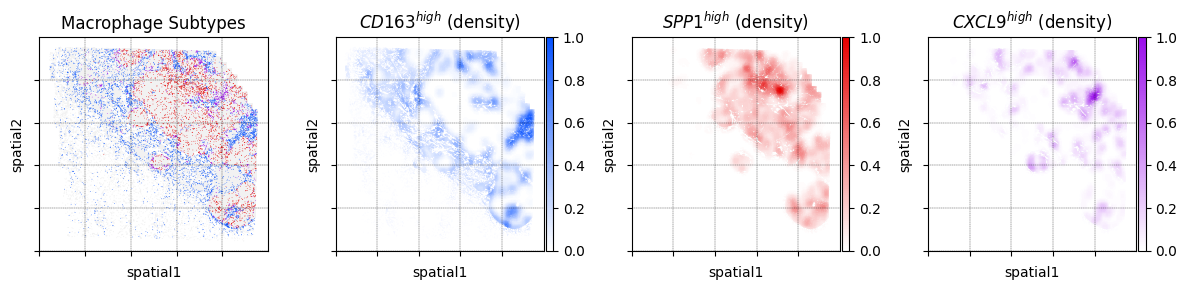

In [6]:
# ad, groups, groupby, groupnames, dot_size=7, title=None, grid=True, n_grids = 5
fig, _ = mb.plot.location_and_density(
    adata, 
    'Cell Subtype', 
    [['mono/mac (CD163-high)'], ['mono/mac (SPP1-high)'], ['mono/mac (CXCL9-high)']],     
    [r'$CD163^{high}$', r'$SPP1^{high}$', r'$CXCL9^{high}$'],
    dot_size=[1, 1, 1], 
    title='Macrophage Subtypes', 
    grid=True, 
    n_grids=5,
    show=False
)
plt.tight_layout()
fig.savefig('./output/publication_figures/density_location_macrophage_subtypes.pdf', format='pdf')
fig.savefig(
    './output/publication_figures/density_location_macrophage_subtypes.png', 
    format='png', dpi=200, bbox_inches='tight'
)
plt.show()

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../monkeybread/src/monkeybread/calc/_cell_density.py:81: RuntimeWarning: overflow encountered in exp
  kernel = 1 / np.exp(np.square(bin_distances / bandwidth))
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../mo

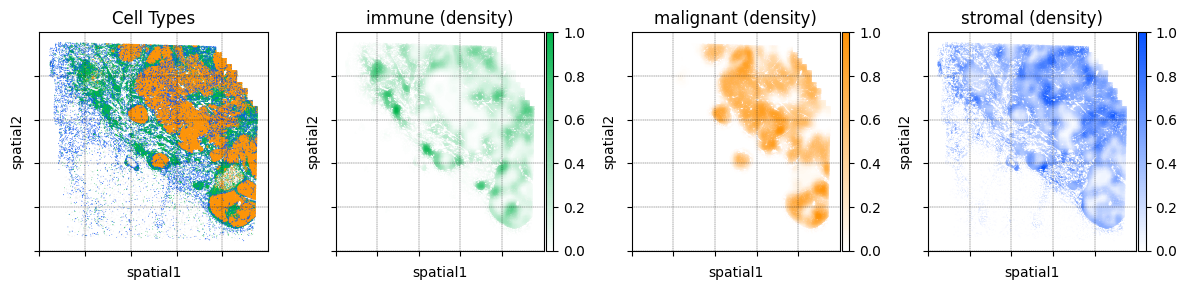

In [7]:
# ad, groups, groupby, groupnames, dot_size=7, title=None, grid=True, n_grids = 5
fig, _ = mb.plot.location_and_density(
    adata, 
    'Cell Type', 
    [['CD8 T', 'CD4 T', 'Treg', 'B lineage', 'cDC', 'pDC', 'mono/mac'], ['malignant'], ['stromal']],     
    ['immune', 'malignant', 'stromal'],
    dot_size=[1, 1, 1], 
    title='Cell Types', 
    palette=[
        "#01b44c",
        "#ff9408",
        "#0652ff"
    ],
    grid=True, 
    n_grids=5,
    show=False
)
plt.tight_layout()
fig.savefig('./output/publication_figures/density_main_subtypes.pdf', format='pdf')
fig.savefig(
    './output/publication_figures/density_main_subtypes.png', 
    format='png', dpi=200, bbox_inches='tight'
)
plt.show()

# Niche analysis

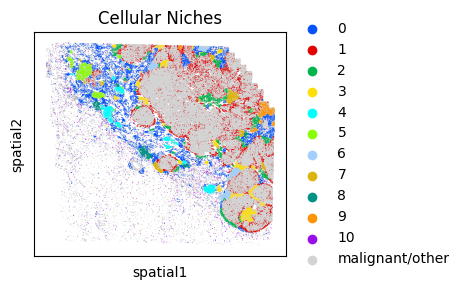

In [16]:
# Map niche to color
niche_to_color = {
    val: mb.plot.monkey_palette[i]
    for i, val in enumerate(sorted(set(adata_neighbors_immune.obs['niche'])))
}
niche_to_color['malignant/other'] = 'lightgrey'


fig, ax = plt.subplots(1,1,figsize=(4.75,3))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'niche',
    palette=niche_to_color,
    s=1,
    ax=ax,
    show=False
)
ax.set_title('Cellular Niches')
plt.tight_layout()
fig.savefig('./output/publication_figures/niches_spatial.pdf', format='pdf')
fig.savefig('./output/publication_figures/niches_spatial.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

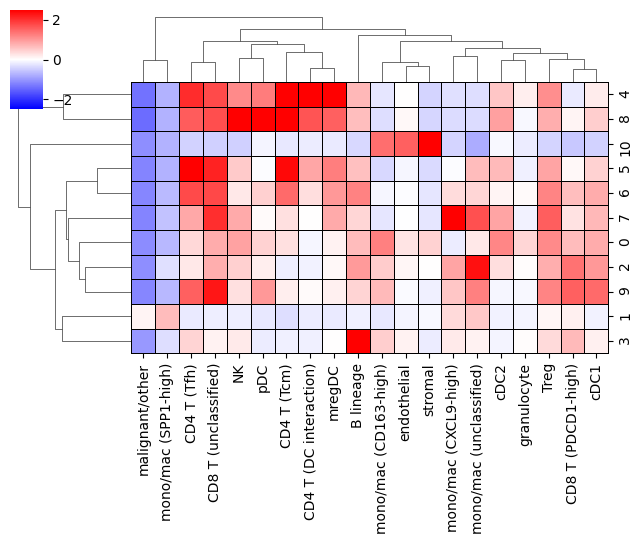

In [17]:

mb.plot.neighbors_profile_matrixplot(
    adata_neighbors_immune,
    'niche',
    include_niches=[ # Exclude the miscellaneous niches from the plot
        niche 
        for niche in set(adata_neighbors_immune.obs['niche'])
        if niche != 'malignant/other'
    ],
    clustermap_kwargs={
        'linewidths': 0.5,
        'linecolor': 'black',
        'cmap': 'bwr',
        'clip_on': False,
        'vmin': -2.5,
        'vmax': 2.5,
        'figsize': (6.5,5.5)
    },
    show=False
)
#plt.tight_layout()
plt.savefig('./output/publication_figures/niche_heatmap.pdf', format='pdf')
plt.savefig('./output/publication_figures/niche_heatmap.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

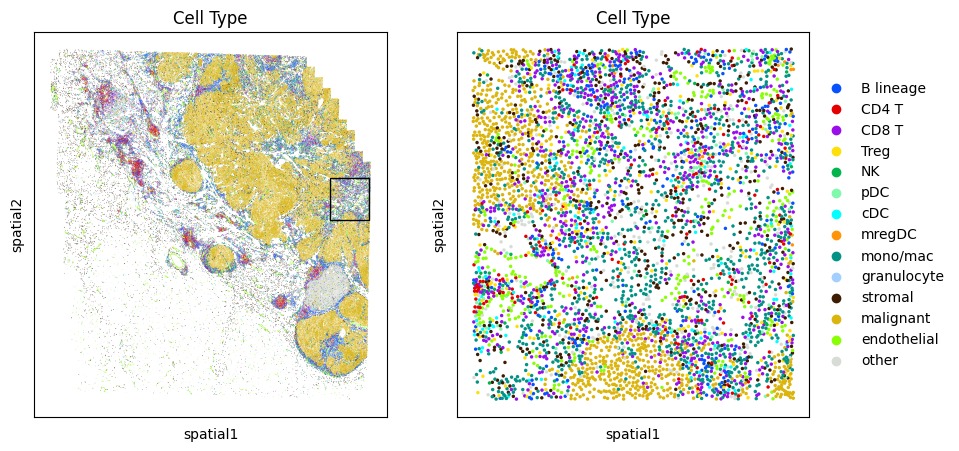

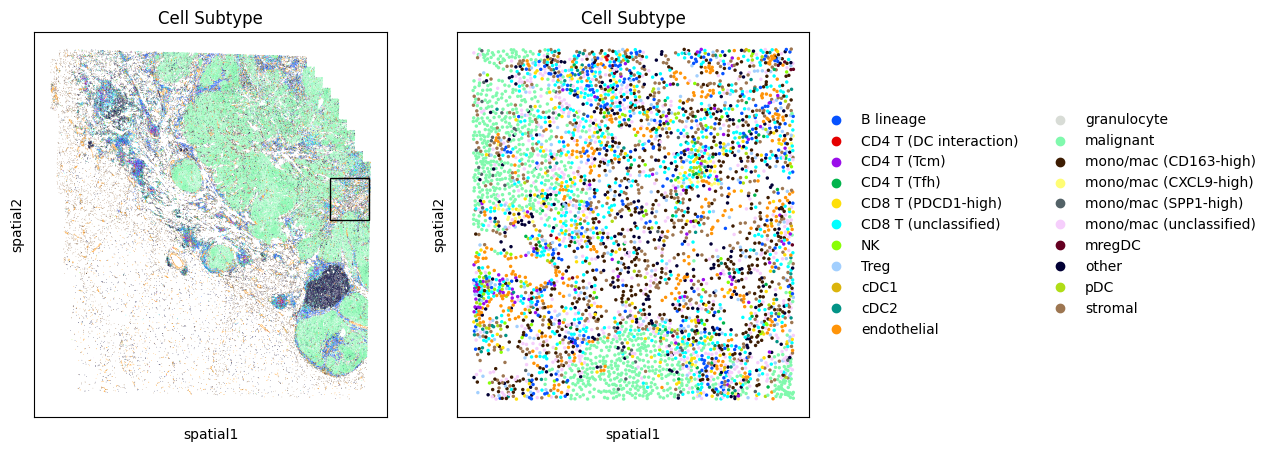

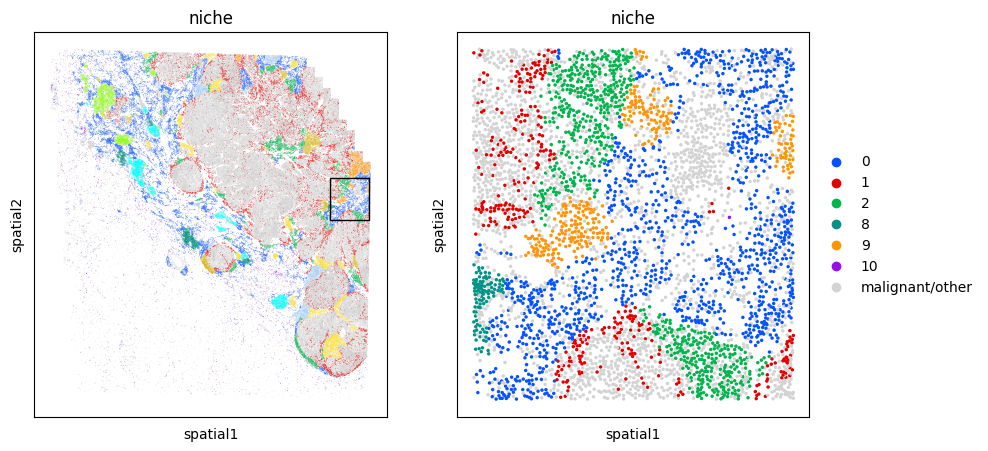

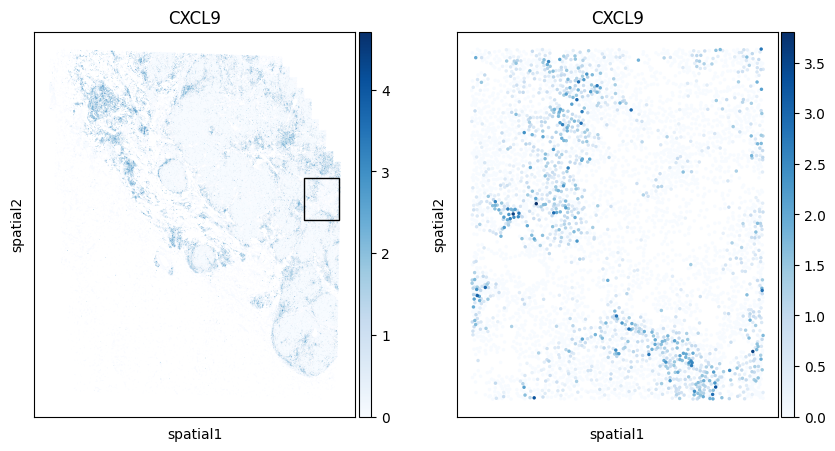

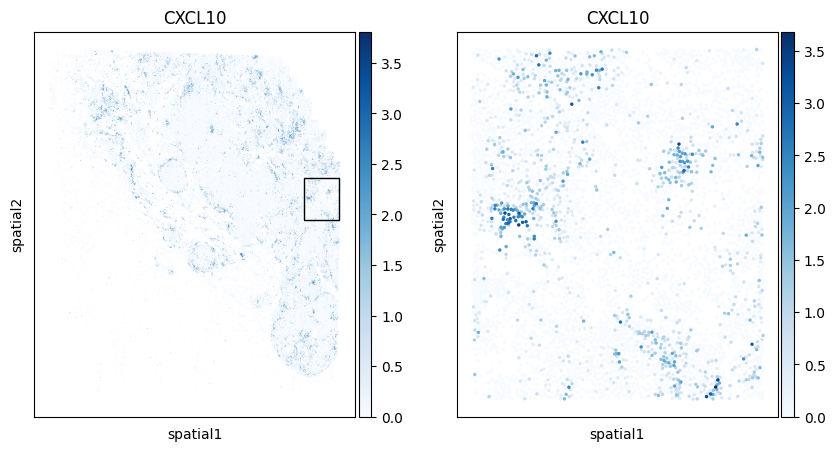

In [20]:
LEFT_PCT = 0.84
TOP_PCT = 0.38
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='Cell Type', 
    mask=None, 
    basis='spatial', 
    palette=ct_to_color,
    show=True,
    axs=axarr
)

fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Subtype'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='Cell Subtype', 
    mask=None, 
    basis='spatial', 
    palette=ct_to_color,
    show=True,
    axs=axarr
)

fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    mask=None, 
    basis='spatial', 
    palette=niche_to_color,
    show=True,
    axs=axarr
);

fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL9', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL10', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);

We'll use Scanpy's native violin plot function to explore the expression of CXCL9 and CXCL10 in all cells within Niches 2 and 5

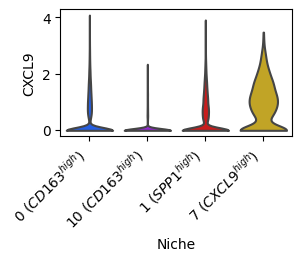

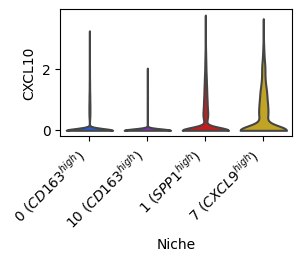

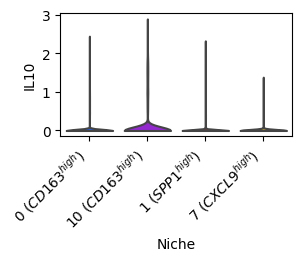

In [53]:
PLOT_NICHES = ['0', '10', '1', '7']

fig, ax = plt.subplots(1,1, figsize=(3,2))
sc.pl.violin(
    adata[adata.obs['niche'].isin(PLOT_NICHES)], 
    groupby='niche', 
    keys=['CXCL9'], 
    palette=[
        niche_to_color[x]
        for x in PLOT_NICHES
    ],
    order=PLOT_NICHES,
    ax=ax,
    stripplot=False,
    show=False
)
plt.tight_layout()
ax.set_xlabel('Niche')
ax.set_xticklabels(
    [
        r'0 ($CD163^{high}$)',
        r'10 ($CD163^{high}$)',
        r'1 ($SPP1^{high}$)',
        r'7 ($CXCL9^{high}$)',
    ],
    rotation=45,
    ha='right'
)
fig.savefig('./output/publication_figures/violin_cxcl9.pdf', format='pdf')
fig.savefig('./output/publication_figures/violin_cxcl9.png', format='png', 
    bbox_inches='tight', dpi=200)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(3,2))
sc.pl.violin(
    adata[adata.obs['niche'].isin(PLOT_NICHES)], 
    groupby='niche', 
    keys=['CXCL10'], 
    palette=[
        niche_to_color[x]
        for x in PLOT_NICHES
    ],
    order=PLOT_NICHES,
    ax=ax,
    stripplot=False,
    show=False
)
plt.tight_layout()
ax.set_xlabel('Niche')
ax.set_xticklabels(
    [
        r'0 ($CD163^{high}$)',
        r'10 ($CD163^{high}$)',
        r'1 ($SPP1^{high}$)',
        r'7 ($CXCL9^{high}$)',
    ],
    rotation=45,
    ha='right'
)
fig.savefig('./output/publication_figures/violin_cxcl10.pdf', format='pdf')
fig.savefig('./output/publication_figures/violin_cxcl10.png', format='png', 
    bbox_inches='tight', dpi=200)
plt.show()


fig, ax = plt.subplots(1,1, figsize=(3,2))
sc.pl.violin(
    adata[adata.obs['niche'].isin(PLOT_NICHES)], 
    groupby='niche', 
    keys=['IL10'], 
    palette=[
        niche_to_color[x]
        for x in PLOT_NICHES
    ],
    order=PLOT_NICHES,
    ax=ax,
    stripplot=False,
    show=False
)
plt.tight_layout()
ax.set_xlabel('Niche')
ax.set_xticklabels(
    [
        r'0 ($CD163^{high}$)',
        r'10 ($CD163^{high}$)',
        r'1 ($SPP1^{high}$)',
        r'7 ($CXCL9^{high}$)',
    ],
    rotation=45,
    ha='right'
)
#fig.savefig('./output/publication_figures/violin_cxcl10.pdf', format='pdf')
#fig.savefig('./output/publication_figures/violin_cxcl10.png', format='png', 
#    bbox_inches='tight', dpi=200)
plt.show()


/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:161: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


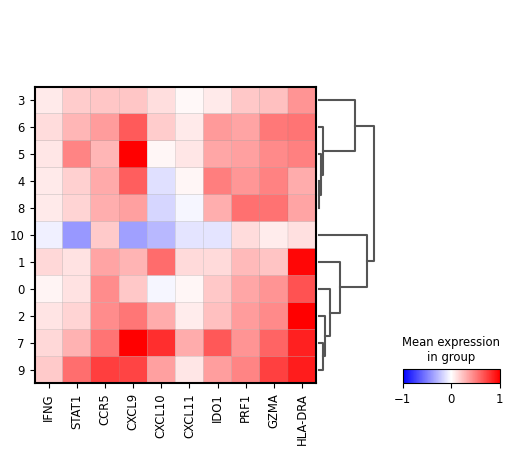

In [97]:

adata_plot = adata.copy()
sc.pp.scale(adata_plot)
adata_plot = adata_plot[~adata_plot.obs['niche'].isin(['malignant/other'])]
sc.tl.dendrogram(adata_plot, groupby='niche')

sc.pl.matrixplot(
    adata_plot,
    groupby='niche',
    cmap='bwr',
    vmin=-1,
    vmax=1,
    var_names=[
        'IFNG', 
        'STAT1', 
        'CCR5', 
        'CXCL9', 
        'CXCL10', 
        'CXCL11', 
        'IDO1', 
        'PRF1', 
        'GZMA', 
        'HLA-DRA'
    ],
    dendrogram=True,
    show=False
)
plt.savefig('./output/publication_figures/infg_sig_niche_heatmap.pdf', format='pdf')
plt.savefig('./output/publication_figures/infg_sig_niche_heatmap.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

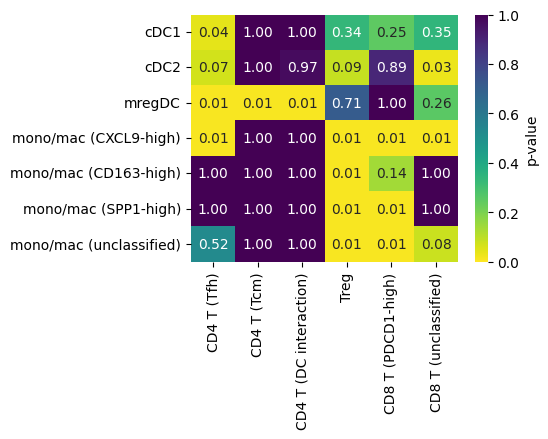

In [91]:
# Only look in niches that are not the malignant/other niche
adata_test = adata[~adata.obs['niche'].isin(['malignant/other'])]

# Define cell types we want to analyze
MOMAC_SUBTYPES = [
    'cDC1',
    'cDC2',
    'mregDC',
    'mono/mac (CXCL9-high)',
    'mono/mac (CD163-high)',
    'mono/mac (SPP1-high)',
    'mono/mac (unclassified)'
]
T_CELL_SUBTYPES = [
    'CD4 T (Tfh)', 
    'CD4 T (Tcm)', 
    'CD4 T (DC interaction)',
    #'CD4 T (unclassified)',
    'Treg',
    'CD8 T (PDCD1-high)', 
    'CD8 T (unclassified)'
]

# Compute distance from each myeloid cell type to the nearest T cell subtype
ct1_to_ct2_to_dists = mb.calc.shortest_distances_pairwise(
    adata_test, 
    'Cell Subtype', 
    MOMAC_SUBTYPES, 
    T_CELL_SUBTYPES
)

# Calculate significance of these shortest distances
ct1_to_ct2_to_perms, ct1_to_ct2_to_pval = mb.stat.shortest_distances_pairwise(
    adata_test, 
    'Cell Subtype', 
    MOMAC_SUBTYPES, 
    T_CELL_SUBTYPES,
    n_perms=100,
    observed=ct1_to_ct2_to_dists, 
    threshold=20
)


fig, ax = plt.subplots(1,1,figsize=(5.5,4.5))
mb.plot.shortest_distances_pairwise(
    ct1_to_ct2_to_pval,
    order_x=T_CELL_SUBTYPES,
    order_y=MOMAC_SUBTYPES,
    ax=ax,
    show=False
);
plt.tight_layout()
fig.savefig('./output/publication_figures/colocalization_p_value_heatmap.pdf', format='pdf')
fig.savefig('./output/publication_figures/colocalization_p_value_heatmap.png', format='png', 
    bbox_inches='tight', dpi=200)
plt.show()



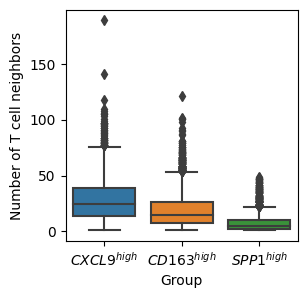

In [32]:
df_counts_m1_m2_t = mb.calc.number_of_neighbors_from_masks(
    adata,
    {
        r'$CXCL9^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (CXCL9-high)',
        r'$CD163^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (CD163-high)',
        r'$SPP1^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (SPP1-high)',
        
    },
    adata.obs['Cell Type'].isin(['CD8 T', 'CD4 T', 'Treg'])
)

fig, ax = plt.subplots(1,1,figsize=(3,3))
mb.plot.number_of_neighbors(
    df_counts_m1_m2_t,
    plot='box',
    stripplot=False,
    strip_kwargs={'s': 1},
    ax=ax
)
ax.set_ylabel('Number of T cell neighbors')
fig.savefig('./output/publication_figures/num_t_cell_neighbors_boxplot.pdf', format='pdf')
fig.savefig('./output/publication_figures/num_t_cell_neighbors_boxplot.png', format='png', 
    bbox_inches='tight', dpi=200)
plt.show()

## DE Between T cells in Niche 6 versus Niche 2

In [87]:
adata_t = adata[adata.obs['Cell Type'].isin(['CD4 T', 'CD8 T'])]
adata_t = adata_t[adata_t.obs['niche'].isin(['6', '2'])]
sc.tl.rank_genes_groups(adata_t, groupby='niche')

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [88]:
adata_t.obs['Cell Type']

19081    CD4 T
19031    CD4 T
19086    CD4 T
40603    CD4 T
40661    CD8 T
         ...  
87257    CD8 T
87295    CD4 T
87351    CD4 T
88064    CD8 T
88086    CD8 T
Name: Cell Type, Length: 3616, dtype: category
Categories (2, object): ['CD4 T' < 'CD8 T']

In [89]:
df_de = sc.get.rank_genes_groups_df(adata_t, group='6')
df_de = df_de.loc[(df_de['logfoldchanges'] > 0) & (df_de['pvals_adj'] < 0.05)]
top_de_6 = list(df_de['names'])
print(len(top_de_6))
', '.join(top_de_6)

92


'CCR7, KLF2, CXCR4, LAMP3, CXCL9, SELL, NFKB2, TNFRSF13C, ICAM2, CXCR5, TAPBP, CD83, CD5, CD28, IL6R, MYC, TRAC, CD40, ETS1, ZAP70, CD79A, HLA-B, NFKBIA, IDO1, CDKN1B, LEF1, ATM, NFKB1, CD40LG, CD3E, STAT6, MS4A1, ITGA5, PAX5, RELA, LAMC2, JUNB, CD4, STAT4, POU2AF1, CREBBP, IRF3, CCL22, VSIR, BLK, IRF4, MMP9, PPARD, CDKN1A, BRD4, ITK, NLRC5, AKT3, FLT4, ICAM3, PGF, TRAT1, EPHB4, CCR4, SELPLG, STAT5A, MAML1, AKT2, TP53, JAK1, TNFRSF4, CXCL11, TGFBR2, CSF2RA, CD79B, TRBC1, DNMT1, HLA-C, CD22, STING1, SELP, RGMB, GATA3, SOCS3, STAT1, IDO2, BCL2, PRKCA, TLR1, PTPRC, BMI1, HDAC3, FGFBP2, BRAF, CD19, AXIN2, FCRL5'

In [90]:
df_de = sc.get.rank_genes_groups_df(adata_t, group='2')
df_de = df_de.loc[(df_de['logfoldchanges'] > 0) & (df_de['pvals_adj'] < 0.05)]
top_de_2 = list(df_de['names'])
', '.join(top_de_2)

'C1QC, COL1A1, CD14, FCGR3A, FN1, NKG7, SFRP2, CSF1, GZMH, LAG3, HLA-DRB1, HAVCR2, CXCR6, HLA-DRA, LRP1, COL5A1, LMNA, CSF1R, CCR5, GZMB, CCL5, CYBB, MAFB, MRC1, GZMA, FASLG, CCR1, TNFRSF9, BCL2L1, CD8A, CAV1, MARCO, TGFBI, PDCD1, CD163, HLA-DMA, PRF1, IDH1, CCND1, SERPINA1, TREM2, SOD2, CD276, CTSW, LYZ, MMP11, FCGR2A, ZBED2, MSR1, FOS, CCR2, HLA-DPB1, NRP1, BMP1, MMP2, NCR1, TMEM37, CEBPB, CCL4, COL11A1, SIGLEC1, SNAI2, CXCL12, CSF3R, CMKLR1, PDGFRB, AURKB, MMP1, EOMES, KLRK1, FBLN1, HLA-DQA1, KIR2DL4, IL2RB, CXCL16, AMOTL2, EGR1, CCL3, PDGFRA, CD244, CDK6, CD248, CD70, TWIST1, JUN, TBX21, PLA2G2A, PDK4, CXCL1, ITGAM, SLC26A3, VWF, NRAS, PROX1, PDPN, BUB1, WWTR1, ERBB3, IL6, HGF, CTNNB1, CTLA4, CD177, CLEC14A, S100A9, DUSP1, CCL8, IL12A, PDGFC, CD209, FOXM1, ELN, CLEC4C, AKT1, TNFRSF18, CIITA, CLDN5, SLC13A3, TCF7L2, BIRC5, PRTN3, PREX2, IL22, SRC, PDGFA, CXCR2, ITGA1, DKK1, IL1B, FAP, KLRC1, TEAD1, CHEK1, CSF3, LOX, CCNB1, ANGPT2, MZB1, SMOC2, ACKR3, CCR3, CTSG, TEAD4, PCNA, MET, TL

In [91]:
def load_gene_set(fpath, genes_in_data):
    gs_to_genes = {}
    with open(fpath, 'r') as f:
        for l in f.readlines():
            toks = l.strip().split('\t')
            gene_set = toks[0]
            genes = set(toks[2:])
            gs_to_genes[gene_set] = sorted(genes & genes_in_data)
    return gs_to_genes
            
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.reactome.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c7.all.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.kegg.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.bp.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.mf.v2022.1.Hs.symbols.gmt ./data', shell=True)

genes_in_data = set(adata.var_names)

reactome_gs_to_genes = load_gene_set('./data/c2.cp.reactome.v2022.1.Hs.symbols.gmt', genes_in_data)
immune_gs_to_genes = load_gene_set('./data/c7.all.v2022.1.Hs.symbols.gmt', genes_in_data)
kegg_gs_to_genes = load_gene_set('./data/c2.cp.kegg.v2022.1.Hs.symbols.gmt', genes_in_data)
go_bp_gs_to_genes = load_gene_set('./data/c5.go.bp.v2022.1.Hs.symbols.gmt', genes_in_data)
go_mf_gs_to_genes = load_gene_set('./data/c5.go.mf.v2022.1.Hs.symbols.gmt', genes_in_data)

gene_set_name_to_mapping = {
    'Reactome (c2)': reactome_gs_to_genes,
#    'Immune (c7)': immune_gs_to_genes, 
    'Kegg (c2)': kegg_gs_to_genes, 
    'GO Biological Process (c5)': go_bp_gs_to_genes, 
    'GO Molecular Function (c5)': go_mf_gs_to_genes    
}

Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.reactome.v2022.1.Hs.symbols.gmt...
/ [1 files][784.2 KiB/784.2 KiB]                                                
Operation completed over 1 objects/784.2 KiB.                                    
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c7.all.v2022.1.Hs.symbols.gmt...
- [1 files][  6.7 MiB/  6.7 MiB]                                                
Operation completed over 1 objects/6.7 MiB.                                      
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.kegg.v2022.1.Hs.symbols.gmt...
/ [1 files][ 97.7 KiB/ 97.7 KiB]                                                
Operation completed over 1 objects/97.7 KiB.                                     
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.bp.v2022.1.Hs.symbols.gmt...
/ [1 files][  4.8 MiB/  4.8 MiB]                                                
Operation completed over 1 objects/4.8 MiB.                 

In [92]:
total_counts = np.array(np.sum(adata_t.X, axis=0)).squeeze()
is_expressed = np.array(total_counts > 0)
expressed_genes = list(adata_t.var.loc[is_expressed].index)
print(f"{len(expressed_genes)} called 'expressed' genes")

de_genes = top_de_6

for gs_name, gs_to_genes in gene_set_name_to_mapping.items():
    background_genes = set(expressed_genes) | set(de_genes)
    enr = gp.enrich(
        gene_list=de_genes, 
        gene_sets=gs_to_genes,
        background=expressed_genes,
        outdir='./tmp',
        verbose=False
    )
    res_df = enr.results.sort_values(by='P-value', ascending=True).loc[enr.results['Adjusted P-value'] < 0.1]
    print(f"---------------- Gene set: {gs_name} ---------------------")
    print('\n'.join(sorted(res_df['Term'])))
    print()


500 called 'expressed' genes


2023-06-21 18:23:18,763 Warning: No enrich terms using library CUSTOM140693046710272 when cutoff = 0.05


---------------- Gene set: Reactome (c2) ---------------------
REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR_LEADING_TO_GENERATION_OF_SECOND_MESSENGERS
REACTOME_CYTOSOLIC_SENSORS_OF_PATHOGEN_ASSOCIATED_DNA
REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INTERFERON_ALPHA_BETA
REACTOME_SARS_COV_2_HOST_INTERACTIONS
REACTOME_SARS_COV_INFECTIONS
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR
REACTOME_TAK1_DEPENDENT_IKK_AND_NF_KAPPA_B_ACTIVATION

---------------- Gene set: Kegg (c2) ---------------------
KEGG_PRIMARY_IMMUNODEFICIENCY



2023-06-21 18:23:19,526 Warning: No enrich terms using library CUSTOM140692782826304 when cutoff = 0.05


---------------- Gene set: GO Biological Process (c5) ---------------------
GOBP_ACTIVATION_OF_IMMUNE_RESPONSE
GOBP_ALPHA_BETA_T_CELL_ACTIVATION
GOBP_ANTIGEN_RECEPTOR_MEDIATED_SIGNALING_PATHWAY
GOBP_B_CELL_ACTIVATION
GOBP_B_CELL_PROLIFERATION
GOBP_B_CELL_RECEPTOR_SIGNALING_PATHWAY
GOBP_IMMUNE_RESPONSE_REGULATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY
GOBP_IMMUNE_RESPONSE_REGULATING_SIGNALING_PATHWAY
GOBP_MONONUCLEAR_CELL_DIFFERENTIATION
GOBP_NEGATIVE_T_CELL_SELECTION
GOBP_T_CELL_SELECTION

---------------- Gene set: GO Molecular Function (c5) ---------------------




In [93]:
de_genes = top_de_2

for gs_name, gs_to_genes in gene_set_name_to_mapping.items():
    background_genes = set(expressed_genes) | set(de_genes)
    enr = gp.enrich(
        gene_list=de_genes, 
        gene_sets=gs_to_genes,
        background=expressed_genes,
        outdir='./tmp',
        verbose=False
    )
    res_df = enr.results.sort_values(by='P-value', ascending=True).loc[enr.results['Adjusted P-value'] < 0.1]
    print(f"---------------- Gene set: {gs_name} ---------------------")
    print('\n'.join(sorted(res_df['Term'])))
    print()

2023-06-21 18:23:19,675 Warning: No enrich terms using library CUSTOM140692619992448 when cutoff = 0.05
2023-06-21 18:23:19,701 Warning: No enrich terms using library CUSTOM140693012026752 when cutoff = 0.05


---------------- Gene set: Reactome (c2) ---------------------


---------------- Gene set: Kegg (c2) ---------------------




2023-06-21 18:23:20,451 Warning: No enrich terms using library CUSTOM140693012171968 when cutoff = 0.05
2023-06-21 18:23:20,547 Warning: No enrich terms using library CUSTOM140693011935872 when cutoff = 0.05


---------------- Gene set: GO Biological Process (c5) ---------------------


---------------- Gene set: GO Molecular Function (c5) ---------------------




# Ligand-receptor analysis

We will no perform a ligand receptor analysis examining how cells of various cell types are interacting in the tumor microenvironment. 

In the following example, we will examine how monocytes/macrophages are interacting with T cells in the tumor microenvironment. Specifically, it is known that CXCL10 and CXCL9 are expressed by immune cells in the presence of interferon gamma. Moreover, CXCL10 and CXCL9 bind to CXCR3. 

Here, we calculate the co-expression score of CXCL10/CXCR3 and CXCL9/CXCR3 between monocytes/macrophages and T cells respectively. This score is defined as `sqrt(l*r)` where `l` is the expression of the ligand and `r` is the expression of the receptor. 

In [33]:
# For each pDC, find the neighboring Tregs
cell_to_neighbors = mb.calc.cell_neighbors(
    adata,
    groupby='Cell Type',
    group1=['mono/mac'],
    group2=['CD8 T', 'CD4 T', 'Treg'],
    radius=20
) 

lr_pair_to_score = mb.calc.ligand_receptor_score(
    adata,
    cell_to_neighbors,
    lr_pairs=[
        ('CXCL10', 'CXCR3'),
        ('CXCL9', 'CXCR3')
    ]
)
lr_pair_to_score

{('CXCL10', 'CXCR3'): 0.17523273833828673,
 ('CXCL9', 'CXCR3'): 0.2842777375343989}

Next we will use these co-expression scores to calculate a p-value for enrichment of co-expression of CXCL10/CXCR3 and CXCL9/CXCR3
between each monocyte/macrophgae and their neighboring T cells.

This statistical test is described in detail in [He _et al_., _bioRxiv_, 2022](https://doi.org/10.1101/2021.11.03.467020) (See Figure 4). 

In [34]:
mb.stat.ligand_receptor_score(
    adata,
    cell_to_neighbors,
    actual_scores=lr_pair_to_score
)

{('CXCL10',
  'CXCR3'): (array([0.17400212, 0.17402413, 0.17127975, 0.17208773, 0.17378183,
         0.17140575, 0.17283197, 0.17324986, 0.17445084, 0.17148369,
         0.17138758, 0.17149001, 0.17326571, 0.17185535, 0.17299338,
         0.17372579, 0.1705263 , 0.1732254 , 0.17531366, 0.17354104,
         0.17138174, 0.17167733, 0.17063796, 0.17474575, 0.17291555,
         0.17358525, 0.17270215, 0.17178513, 0.17119776, 0.17191826,
         0.17339433, 0.17419757, 0.17228673, 0.17315925, 0.1732701 ,
         0.17211966, 0.17436254, 0.17157863, 0.17194671, 0.17158441,
         0.17319132, 0.17281233, 0.17276676, 0.17367954, 0.17317762,
         0.17202617, 0.17428341, 0.17431405, 0.1728015 , 0.17274726,
         0.17112232, 0.1725834 , 0.17420996, 0.17184297, 0.17253772,
         0.17148031, 0.1744598 , 0.17323981, 0.17373944, 0.17352962,
         0.17330185, 0.17136975, 0.17166029, 0.17338671, 0.17321594,
         0.17159436, 0.17309258, 0.17599504, 0.17125121, 0.17273309,
         0.

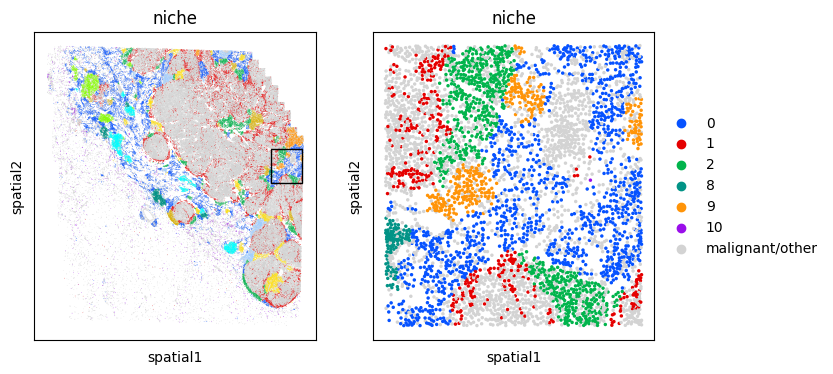

<Figure size 640x480 with 0 Axes>

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


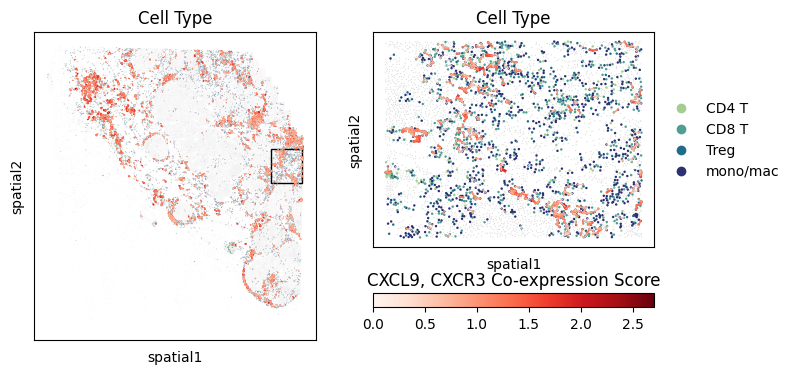

<Figure size 640x480 with 0 Axes>

In [49]:
LEFT_PCT = 0.84
TOP_PCT = 0.38
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

# Plot the niche
fig, axarr = plt.subplots(1,2,figsize=(8,4))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    basis='spatial', 
    #palette=ct_to_color,
    #zoom_s=25,
    #mask=[(x in ['CD4 T', 'mregDC']) for x in adata.obs['Cell Type']],
    #s=5,
    show=True,
    axs=axarr
)
plt.tight_layout()
fig.savefig('./output/publication_figures/zoom_niche0.pdf', format='pdf')
fig.savefig('./output/publication_figures/zoom_niche0.png', format='png', dpi=200, bbox_inches='tight')
plt.show()


# Plot the cells co-expressing CXCL9/CXCR3
fig, axarr = plt.subplots(1,2,figsize=(8,4))
lr_scores = mb.plot.ligand_receptor_embedding_zoom(
    adata,
    ('CXCL9', 'CXCR3'),
    cell_to_neighbors,
    color='Cell Type',
    palette='crest',
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    cmap_name='Reds',
    max_lw=3,
    max_lw_scale_unzoom=0.5,
    vmin=-1,
    vmax=1,
    axs=axarr
)
plt.tight_layout()
fig.savefig('./output/publication_figures/ligand_receptor_zoom_CXCL9_CXCR3_niche0.pdf', format='pdf')
fig.savefig('./output/publication_figures/ligand_receptor_zoom_CXCL9_CXCR3_niche0.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

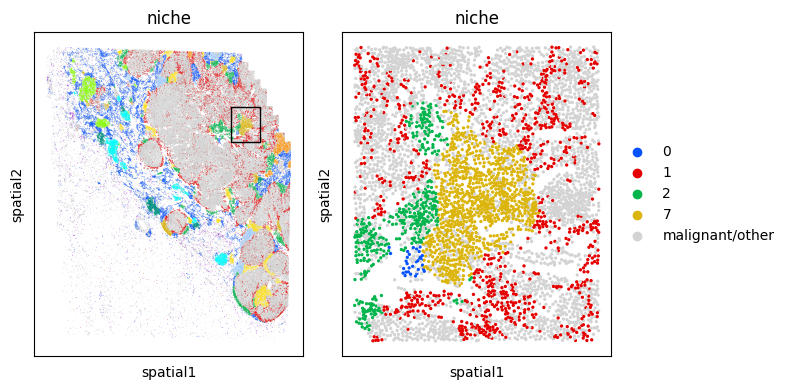

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


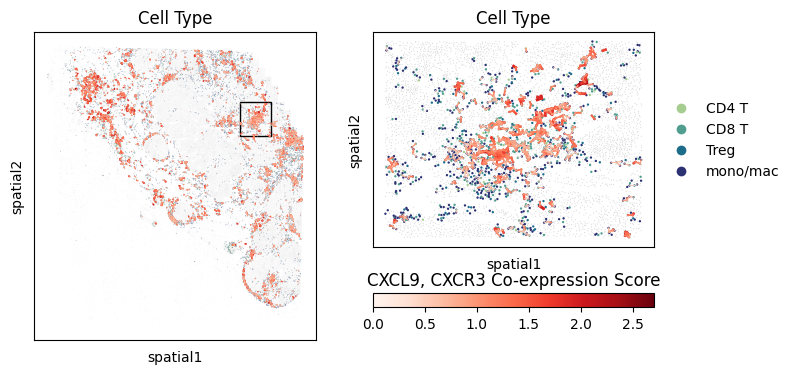

<Figure size 640x480 with 0 Axes>

In [50]:
LEFT_PCT = 0.73
TOP_PCT = 0.23
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

# Plot the niche
fig, axarr = plt.subplots(1,2,figsize=(8,4))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    basis='spatial', 
    #palette=ct_to_color,
    #zoom_s=25,
    #mask=[(x in ['CD4 T', 'mregDC']) for x in adata.obs['Cell Type']],
    #s=5,
    show=False,
    axs=axarr
)
plt.tight_layout()
fig.savefig('./output/publication_figures/zoom_niche7.pdf', format='pdf')
fig.savefig('./output/publication_figures/zoom_niche7.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

# Plot the cells co-expressing CXCL9/CXCR3
fig, axarr = plt.subplots(1,2,figsize=(8,4))
lr_scores = mb.plot.ligand_receptor_embedding_zoom(
    adata,
    ('CXCL9', 'CXCR3'),
    cell_to_neighbors,
    color='Cell Type',
    palette='crest',
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    cmap_name='Reds',
    max_lw=3,
    max_lw_scale_unzoom=0.5,
    vmin=-1,
    vmax=1,
    axs=axarr
)
plt.tight_layout()
fig.savefig('./output/publication_figures/ligand_receptor_zoom_CXCL9_CXCR3_niche7.pdf', format='pdf')
fig.savefig('./output/publication_figures/ligand_receptor_zoom_CXCL9_CXCR3_niche7.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

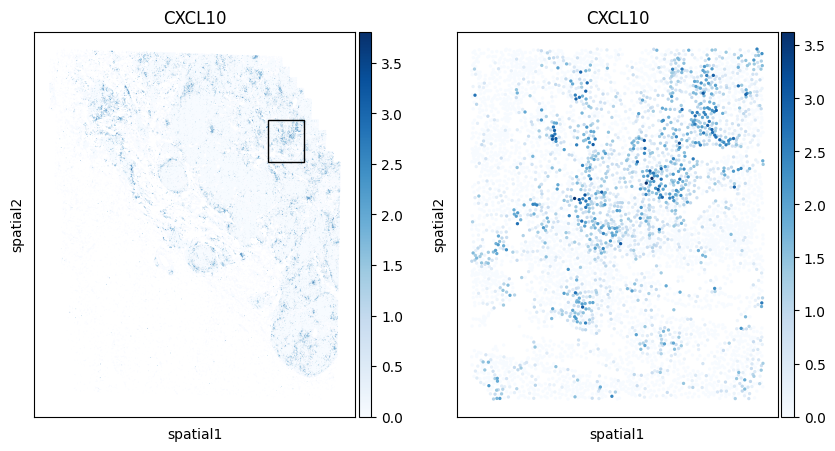

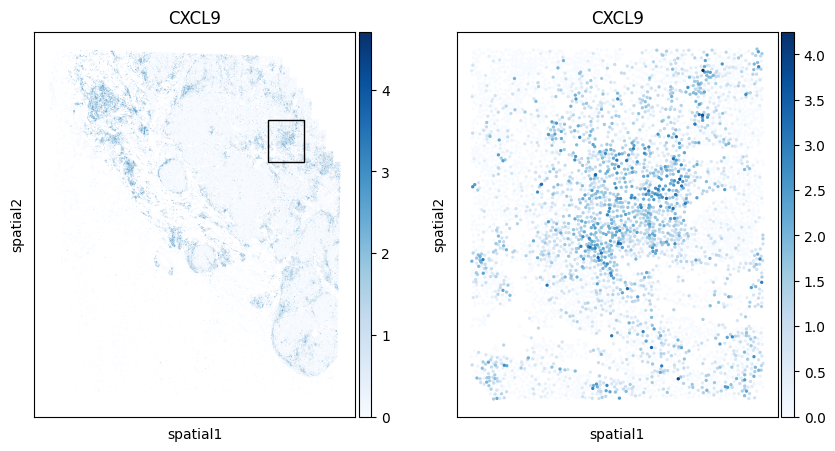

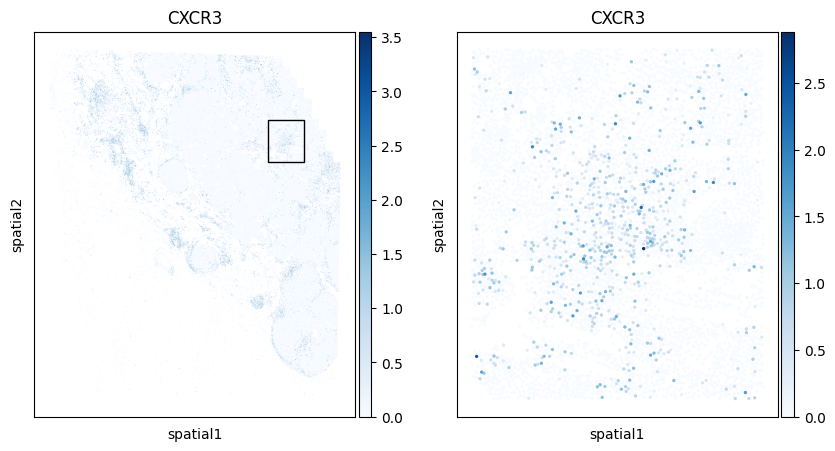

In [39]:
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL10', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL9', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCR3', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);